# **Tutorial PyTorch - 1**

Pada tutorial yang pertama ini kita akan mencoba untuk membuat simple CNN classifier dengan dataset yang telah disediakan oleh PyTorch.

### **1. Load Dataset**
Pertama yang harus dilakukan adalah import library torch dan torchvision

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Mendefinisikan transform untuk pre-processong dan load data set, dan juga melakukan trainloader dan test loader menggunakan data SVHN

In [ ]:
transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

batch_size = 128

traindata = torchvision.datasets.SVHN(root="./data", split= 'train', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=batch_size, shuffle=True, num_workers=4)

testdata = torchvision.datasets.SVHN(root="./data", split= 'test', download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testdata, batch_size=batch_size, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Jumlah data train dan data test

In [ ]:
print("Train = ", len(traindata))
print("Test = ", len(testdata))

Train =  73257
Test =  26032


### **2. Melihat beberapa image dari dataset**
Kita dapat melihat beberapa image yang ada di dataset dengan menggunakan library matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def imgshow(img):
  img = img / 2 + 0.5 #konversi dari -1.1 ke 0.1
  imgn = img.numpy()
  plt.imshow(np.transpose(imgn,(1,2,0)))
  plt.show()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


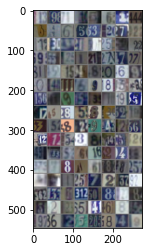

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imgshow(torchvision.utils.make_grid(images))

### **3. Mendifinisikan CNN model**
CNN model didefinisikan menggunakan kelas yang diturunkan dari kelas torch.nn.Module.
Dan juga mendefinisikan loss function dan optimizer

In [ ]:
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class CNNModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(3,6,5)
    self.pool1 = torch.nn.MaxPool2d(2,2)
    self.conv2 = torch.nn.Conv2d(6,16,5)
    self.pool2 = torch.nn.MaxPool2d(2,2)
    self.fc1 = torch.nn.Linear(16*5*5,120)
    self.fc2 = torch.nn.Linear(120,84)
    self.fc3 = torch.nn.Linear(84,10)

  def forward(self,x):
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = (self.fc3(x))

    return x

net = CNNModel()
net.to("cuda")
print(net)

### mendefinisikan loss function
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.01,momentum=0.9)

CNNModel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### **4. Training**
Looping per epoch dan update menggunakn optimizer

In [ ]:
for epoch in range(10):
###
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    inputs, labels = data
    inputs = inputs.to("cuda")
    optimizer.zero_grad()

    outputs = net(inputs)
    outputs = outputs.cpu()
    lossval = loss(outputs, labels)
    lossval.backward()
    optimizer.step()

    running_loss += lossval.item()
  #if (i+1) % 2000 == 0:
  print("Epoch:",epoch+1,"Minibatchke:",i+1,"Loss:",running_loss/len(traindata))
  running_loss = 0.0
print("Finish ...")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 1 Minibatchke: 573 Loss: 0.0018831561360783977
Epoch: 2 Minibatchke: 573 Loss: 0.0017844685076892654
Epoch: 3 Minibatchke: 573 Loss: 0.001669624466037881
Epoch: 4 Minibatchke: 573 Loss: 0.001580834662928759
Epoch: 5 Minibatchke: 573 Loss: 0.0014801649705891802
Epoch: 6 Minibatchke: 573 Loss: 0.001411816867548634
Epoch: 7 Minibatchke: 573 Loss: 0.0013202977673219848
Epoch: 8 Minibatchke: 573 Loss: 0.0012647429431084586
Epoch: 9 Minibatchke: 573 Loss: 0.0012023212977002582
Epoch: 10 Minibatchke: 573 Loss: 0.001165724149089283
Finish ...


Menyimpan hasil agar bisa di load kembali

In [ ]:
torch.save(net.cpu().state_dict(),"./svhn.pth")
!ls

data  sample_data  svhn.pth


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


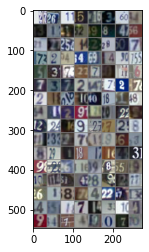

    5     2     1     0     6     1     9     1     1     8     3     6     5     1     4     4     1     6     3     4     2     0     1     3     2     5     4     1     4     2     8     3     8     6     0     1     5     1     1     2     9     1     6     9     2     6     1     2     0     6     9     1     5     1     9     8     1     5     1     5     2     9     2     4     1     0     6     9     3     2     3     5     1     1     4     6     2     8     3     1     4     1     7     1     2     1     7     1     0     1     4     4     6     4     4     2     8     1     7     7     4     8     2     3     2     2     3     1     8     6     3     7     6     3     0     7     2     7     4     2     8     8     1     7     1     9     3     4


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imgshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % testdata.labels[i] for i in range(128) ))

In [ ]:
outputs = net(images)

_, predicted = torch.max(outputs,1)
print(predicted)
print(testdata.labels)
print(' '.join('%5s' % testdata.labels[i] for i in range(128) ))

tensor([2, 6, 1, 5, 1, 3, 6, 4, 3, 1, 1, 2, 9, 3, 4, 6, 1, 2, 5, 1, 2, 8, 0, 7,
        7, 2, 4, 4, 9, 4, 3, 5, 6, 3, 7, 2, 7, 0, 1, 6, 7, 3, 7, 2, 4, 2, 2, 7,
        2, 1, 1, 1, 0, 8, 1, 8, 4, 1, 2, 9, 1, 0, 2, 2, 2, 2, 1, 9, 2, 7, 2, 8,
        1, 3, 2, 7, 1, 9, 6, 3, 8, 3, 1, 8, 1, 1, 4, 3, 2, 2, 6, 1, 9, 8, 5, 9,
        0, 1, 7, 4, 8, 9, 2, 7, 6, 1, 8, 3, 4, 2, 2, 3, 4, 3, 1, 7, 1, 3, 1, 4,
        9, 4, 1, 4, 9, 0, 7, 0])
[5 2 1 ... 7 6 7]
    5     2     1     0     6     1     9     1     1     8     3     6     5     1     4     4     1     6     3     4     2     0     1     3     2     5     4     1     4     2     8     3     8     6     0     1     5     1     1     2     9     1     6     9     2     6     1     2     0     6     9     1     5     1     9     8     1     5     1     5     2     9     2     4     1     0     6     9     3     2     3     5     1     1     4     6     2     8     3     1     4     1     7     1     2     1     7     1     0     1     4    

Melakukan Test untuk semua image di test set

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data

    outputs = net(images)

    _,predicted = torch.max(outputs,1)

    total += labels.size(0)
    
    correct += (predicted == labels).sum().item()
result = (correct/float(total)*100)
print("Acc:",result)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Acc: 88.69084204056546
